In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
# Initialize the video capture
cap = cv2.VideoCapture(1)
sampleNum = 1
save_path = "C:\\Users\\annuy\\Intership project 1 text extraction\\image_detect"

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Display the frame
    cv2.imshow('Document Capture', frame)
    
    # Wait for user input
    key = cv2.waitKey(1)
    
    # If 'space' is pressed, save the frame as an image
    if key == ord(' '):  # Space bar to capture
        cv2.imwrite(f"{save_path}/document_{sampleNum}.jpg", frame)
        print(f"Captured document image {sampleNum}")
        sampleNum += 1
    
    # Exit the loop when 'Esc' key is pressed or after saving 10 images
    if key == 27 or sampleNum > 4:  # Escape key to exit
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


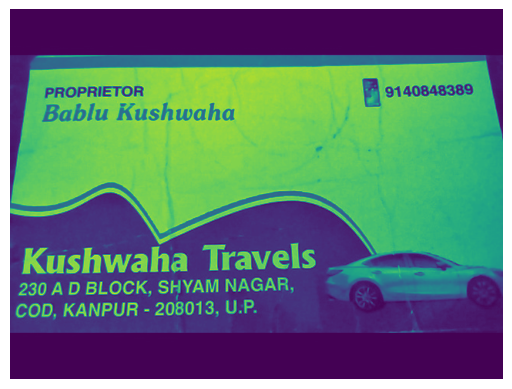

C:\Users\annuy\Intership project 1 text extraction\image_detect\document_1.jpg


In [3]:
# Folder path and base file name
folder_path = "C:\\Users\\annuy\\Intership project 1 text extraction\\image_detect"
base_filename = "document_"  # Adjust to match your file naming convention, e.g., "user."

sampleNum = 1  # Starting image number

# Construct the full file path
file_path = os.path.join(folder_path, f"{base_filename}{sampleNum}.jpg")

# Check if the file exists and load the image
if os.path.exists(file_path):
    
    img = cv2.imread(file_path)
    if img is not None:

        rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
        plt.imshow(gray_image)
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not loaded correctly for sample number {sampleNum}")
else:
    print(f"Image file does not exist at: {file_path}")

print(file_path)

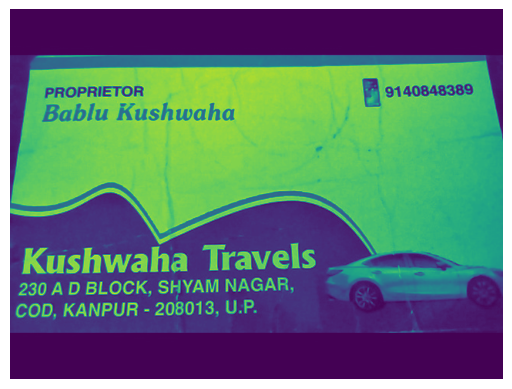

In [4]:

plt.imshow(gray_image)
plt.axis('off')
plt.show()

In [5]:
# Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

In [6]:
# plt.imshow(blurred_image)
# plt.axis('off')
# plt.show()


In [7]:
# Otsu's Thresholding
_, binary_image = cv2.threshold(
    gray_image, 0, 255, 
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

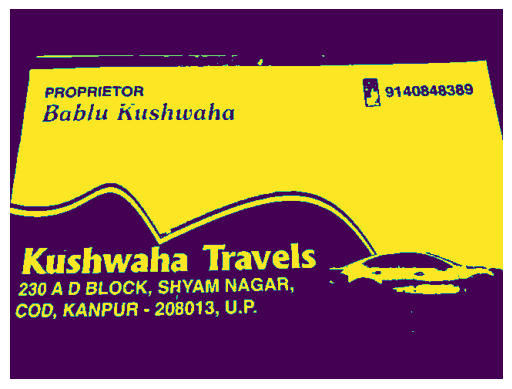

In [8]:
plt.imshow(binary_image)
plt.axis('off')
plt.show()


In [9]:
scale_percent = 150  # Increase size by 150%
width = int(binary_image.shape[1] * scale_percent / 100)
height = int(binary_image.shape[0] * scale_percent / 100)
resized_image = cv2.resize(binary_image, (width, height), interpolation=cv2.INTER_LINEAR)


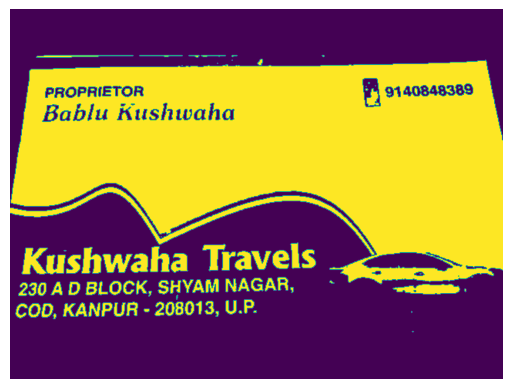

In [10]:
plt.imshow(resized_image)
plt.axis('off')
plt.show()



In [11]:
# # coords = cv2.findNonZero(cv2.bitwise_not(binary_image))
# # angle = cv2.minAreaRect(coords)[-1]
# # if angle < -45:
# #     angle = 180 + angle
# # else:
# #     angle = -angle

# # (h, w) = binary_image.shape[:2]
# # center = (w // 2, h // 2)
# # M = cv2.getRotationMatrix2D(center, angle, 1.0)
# # deskewed_image = cv2.warpAffine(binary_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)



# coords = cv2.findNonZero(cv2.bitwise_not(binary_image))
# angle = cv2.minAreaRect(coords)[-1]
# if angle < -45:
#     angle = 90 + angle
# else:
#     angle = -angle

# (h, w) = binary_image.shape[:2]
# center = (w // 2, h // 2)
# M = cv2.getRotationMatrix2D(center, angle, 1.0)
# deskewed_image = cv2.warpAffine(binary_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)



In [13]:
# plt.imshow(deskewed_image)
# plt.axis('off')
# plt.show()



In [14]:
cv2.imwrite('preprocessed_image.png', resized_image)

True

[2024/11/30 10:39:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\annuy/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\annuy/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

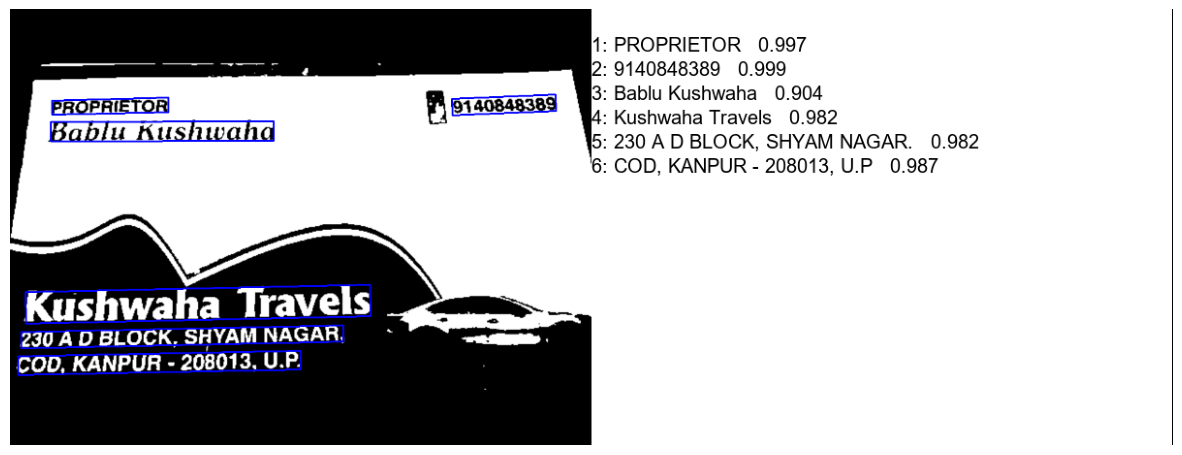

In [15]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import matplotlib.pyplot as plt
from docx import Document

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, use_gpu=False, lang='en')

def show_ocr(ocr, img_path, output_file):
    # Perform OCR
    result = ocr.ocr(img_path)

    # Load the image
    image = cv2.imread(img_path)

    # Filter results with scores > 70
    filtered_boxes = []
    filtered_texts = []
    filtered_scores = []

    for line in result[0]:
        box, (text, score) = line
        if score > 0.70:  # Filter condition
            filtered_boxes.append(box)
            filtered_texts.append(text)
            filtered_scores.append(score)

    print("Filtered Texts:", filtered_texts)
    
    
    # Path to a valid font file
    font_path = "C:\\Windows\\Fonts\\Arial.ttf"  # Update to the correct path for your OS

    # Draw OCR results for filtered words
    if filtered_boxes:  # Check if valid results exist
        im_show = draw_ocr(image, filtered_boxes, filtered_texts, filtered_scores, font_path=font_path)

        # Convert BGR to RGB for display
        img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)

        # Set figure size for clear output
        plt.figure(figsize=(15, 10))  # Adjust the size as needed
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("No valid text found with a score above 70%.")

    # Save the filtered text into a Word document
    document = Document()
    for text in filtered_texts:
        document.add_paragraph(text)

    # Save the document
    document.save(output_file)

    return filtered_texts

# Example usage
# file_path = deskewed_image  # Replace with the path to your image
output_file = "C:\\Users\\annuy\\Downloads\\output.docx"
k=show_ocr(ocr, 'preprocessed_image.png', output_file)
